PREGUNTAS : 🚨 #5¿Cual es la aparicion mas antigua y mas nueva , en que lugar nacio es superheroe y cual es su Alias?

#6¿Cuantos superheroes buenos y malos existen? ¿Cual es la correlacion entre la aliniacion del superheroe y el editor? ¿Que editor tiene mas superheroes buenos y/o malos?

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch 
import seaborn as sns


df = pd.read_csv("heroes_completo_limpio.csv") 

def limpiar_y_extraer_año(df: pd.DataFrame) -> pd.DataFrame:
  
    # Función para buscar un año (4 digitos) en la cadena.
    def extraer_año(texto):
        if pd.isna(texto) or texto == "Sin dato":
            return np.nan
        # Busca el primer patrón de 4 dígitos que se parezca a un año (por ejemplo: 19XX o 20XX)
        coincidencia = re.search(r'\b(19\d{2}|20\d{2})\b', str(texto))
        return int(coincidencia.group(1)) if coincidencia else np.nan

    df['Año_Aparicion'] = df['Primera aparición'].apply(extraer_año)
    return df


df_limpio = limpiar_y_extraer_año(df.copy())
df_limpio.replace('Sin dato', np.nan, inplace=True) # Reemplazar 'Sin dato' por NaN

def obtener_aparicion_antigua_y_nueva(df: pd.DataFrame) -> tuple:

    df_años_validos = df.dropna(subset=['Año_Aparicion'])
    
    # Heroe con la aparición más antigua (min)
    indice_antiguo = df_años_validos['Año_Aparicion'].idxmin()
    heroe_antiguo = df_años_validos.loc[indice_antiguo]
    
    # Heroe con la aparición más nueva (max)
    indice_nuevo = df_años_validos['Año_Aparicion'].idxmax()
    heroe_nuevo = df_años_validos.loc[indice_nuevo]
    
    
    claves = ['Nombre', 'Primera aparición', 'Lugar de nacimiento', 'Alias', 'Año_Aparicion']
    info_antigua = heroe_antiguo[claves].to_dict()
    info_nueva = heroe_nuevo[claves].to_dict()
    
    return info_antigua, info_nueva

In [2]:
info_antigua, info_nueva = obtener_aparicion_antigua_y_nueva(df_limpio)
df_info_5 = pd.DataFrame({
    "MAS ANTIGUO": info_antigua,
    "MAS NUEVO": info_nueva
})
df_info_5

,MAS ANTIGUO,MAS NUEVO
Nombre,King Kong,Bloodhawk
Primera aparición,King Kong (1933),X-Men (2099) #1
Lugar de nacimiento,Skull Island,-
Alias,"the 8th Wonder of the World, King of Skull Island",Lemuel Halcon
Año_Aparicion,1933.0,2099.0


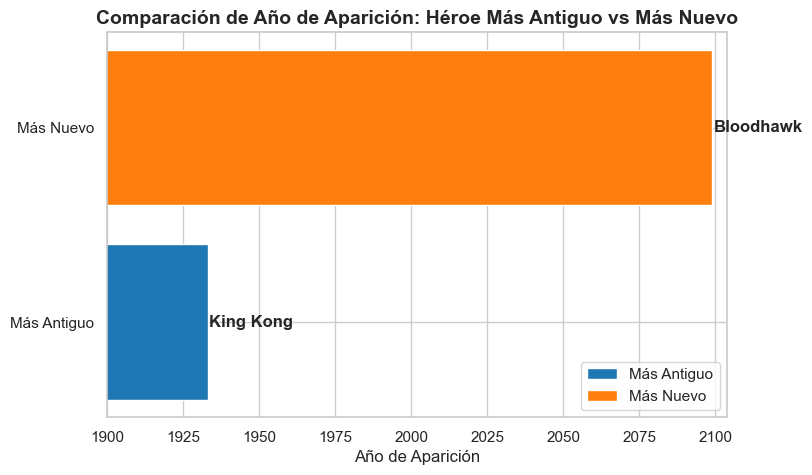

In [3]:
df_grafico_5 = pd.DataFrame({
    'Héroe': ['Más Antiguo', 'Más Nuevo'],
    'Año de Aparición': [info_antigua['Año_Aparicion'], info_nueva['Año_Aparicion']],
    'Nombre': [info_antigua['Nombre'], info_nueva['Nombre']]
})

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))


colors = ['#1f77b4', '#ff7f0e'] 


for i, row in df_grafico_5.iterrows():
    plt.barh(row['Héroe'], row['Año de Aparición'], color=colors[i])
    plt.text(row['Año de Aparición'] + 0.5, i, row['Nombre'], va='center', fontweight='bold')

plt.xlim(1900, df_grafico_5['Año de Aparición'].max() + 5)

plt.title("Comparación de Año de Aparición: Héroe Más Antiguo vs Más Nuevo", fontsize=14, fontweight='bold')
plt.xlabel("Año de Aparición")
plt.ylabel("")

leyenda = [Patch(facecolor=colors[0], label='Más Antiguo'),
           Patch(facecolor=colors[1], label='Más Nuevo')]
plt.legend(handles=leyenda, loc='lower right')

plt.show()



In [4]:
def contar_alineacion_por_editor(df: pd.DataFrame) -> pd.DataFrame:

    df['Alineación'] = df['Alineación'].replace({np.nan: 'Sin dato', '-': 'Sin dato'})
    
    # Se genera la tabla de contingencia
    tabla_pivot = pd.crosstab(df['Editor'], df['Alineación'], dropna=False)
    
   
    tabla_pivot['Total'] = tabla_pivot.sum(axis=1)
    
    # Reordenar columnas para mejor lectura
    orden_columnas = ['good', 'bad', 'neutral', 'Sin dato', 'Total']
    for col in orden_columnas:
        if col not in tabla_pivot.columns:
            tabla_pivot[col] = 0
            
    return tabla_pivot[orden_columnas]

def obtener_resumen_alineacion(df_pivot: pd.DataFrame) -> tuple:
    
    total_buenos = df_pivot['good'].sum()
    total_malos = df_pivot['bad'].sum()
    
    # Editor con más 'good'
    editor_mas_buenos = df_pivot['good'].idxmax()
    
    # Editor con más 'bad'
    editor_mas_malos = df_pivot['bad'].idxmax()
    
    return total_buenos, total_malos, editor_mas_buenos, editor_mas_malos


In [5]:
tabla_alineacion = contar_alineacion_por_editor(df_limpio)
total_buenos, total_malos, editor_mas_buenos, editor_mas_malos = obtener_resumen_alineacion(tabla_alineacion)
df_info_6 = pd.DataFrame({
    "SUPERHEROES": ["Total buenos", "Total malos", "TOTAL"],
    "CANTIDAD": [total_buenos, total_malos, total_buenos + total_malos]
})

print(" ## ¿Cuantos superheroes buenos y malos existen y el TOTAL? ##")

df_info_6


 ## ¿Cuantos superheroes buenos y malos existen y el TOTAL? ##


,SUPERHEROES,CANTIDAD
0,Total buenos,494
1,Total malos,206
2,TOTAL,700


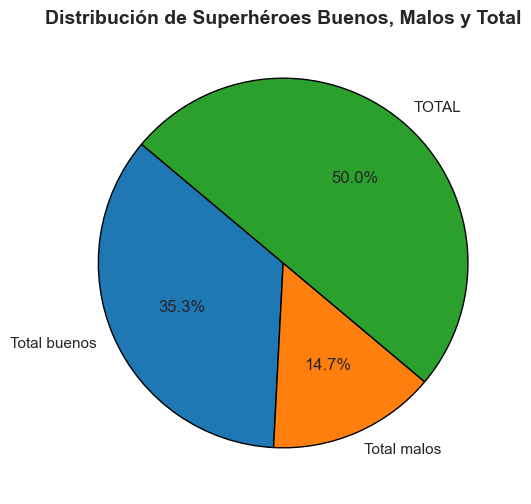

In [6]:

labels = df_info_6['SUPERHEROES']
sizes = df_info_6['CANTIDAD']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor':'black'})

plt.title("Distribución de Superhéroes Buenos, Malos y Total", fontsize=14, fontweight='bold')
plt.show()



In [7]:
tabla_alineacion = contar_alineacion_por_editor(df_limpio)
total_buenos, total_malos, editor_mas_buenos, editor_mas_malos = obtener_resumen_alineacion(tabla_alineacion)

df_info_61 = pd.DataFrame({
    "EDITOR CON MAS BUENOS Y MALOS": ["Editor con más buenos", "Editor con más malos"],
    "EDITOR": [editor_mas_buenos, editor_mas_malos]
})
print(" ## ¿Que editor tiene mas superheroes buenos y/o malos?  ##")
print(" ## EL EDITOR CON MAS MALOS Y BUENOS ES ➡️MARVEL COMICS⬅️ ##")
df_info_61

 ## ¿Que editor tiene mas superheroes buenos y/o malos?  ##
 ## EL EDITOR CON MAS MALOS Y BUENOS ES ➡️MARVEL COMICS⬅️ ##


,EDITOR CON MAS BUENOS Y MALOS,EDITOR
0,Editor con más buenos,Marvel Comics
1,Editor con más malos,Marvel Comics


In [8]:
#correlacion de los 5 mas importantes
df_cat = df_limpio.dropna(subset=['Alineación', 'Editor'])

conteo_editores = df_cat['Editor'].value_counts()

top5_editores = conteo_editores.head(5).index.tolist()

tabla_contingencia = pd.crosstab(df_cat['Editor'], df_cat['Alineación'])

tabla_porcentajes = tabla_contingencia.div(tabla_contingencia.sum(axis=1), axis=0) * 100

df_editor_alineacion = tabla_contingencia.astype(str) + " (" + tabla_porcentajes.round(1).astype(str) + "%)"

df_top5_alineacion = df_editor_alineacion.loc[top5_editores]
print("Correlacion de los 5 mas importantes🏆")
df_top5_alineacion



Correlacion de los 5 mas importantes🏆


Alineación,Sin dato,bad,good,neutral
Editor,,,,
Marvel Comics,1 (0.3%),108 (31.9%),220 (64.9%),10 (2.9%)
DC Comics,1 (0.5%),59 (31.4%),116 (61.7%),12 (6.4%)
Dark Horse Comics,0 (0.0%),6 (33.3%),12 (66.7%),0 (0.0%)
NBC - Heroes,0 (0.0%),3 (16.7%),15 (83.3%),0 (0.0%)
Image Comics,1 (7.1%),11 (78.6%),2 (14.3%),0 (0.0%)
